<a href="https://colab.research.google.com/github/gtyagi777/IDS-for-SDN/blob/master/Classifier_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd


In [6]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_list = drive.ListFile({'q': "'1r2Ybi5qAP3XI6JyI2jojaAc1m_UFxxqz' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: DF.pkl, id: 1y3JHFffO0s9CvD4VoeVJsv-Dk9Rsi1g5
title: Dataset Analysis.ipynb, id: 1FVyxCdWX97kdWtYFzBnUErCYSHIdEKX6
title: MNIST.ipynb, id: 1p42wxMR_N_6MqrbW8MObPWbaSN1U_dfd
title: Untitled2.ipynb, id: 1YGqV7tCSnwWydp072wxdq6tMnJs_lnD_
title: LearningTensorFlow.ipynb, id: 1nWmCudsGj1OcgRE6bjc3qsbG9nLX44Nj
title: Untitled1.ipynb, id: 142t-wUTLHaMSW8Micxkz0xleBRvcpAhU
title: Untitled0.ipynb, id: 10zKY7D_nwzktg3iYm9culrxB6mW_DjL9


In [0]:
train_downloaded = drive.CreateFile({'id': '1y3JHFffO0s9CvD4VoeVJsv-Dk9Rsi1g5'})
train_downloaded.GetContentFile('DF.pkl')
df = pd.read_pickle('DF.pkl')


In [10]:
df[' Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [11]:
df.isnull().any().any()

False

In [12]:
df.shape

(2827876, 80)

In [13]:
df[' Label'].value_counts()

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [14]:
df['Class'].value_counts()

0    2271320
1     556556
Name: Class, dtype: int64

In [15]:
corr_matrix = df.corr()
print(corr_matrix["Class"].sort_values(ascending=False))
y = df['Class']
X = df.drop(['Class', ' Label'], axis=1)

Class                          1.000000
 Bwd Packet Length Std         0.510884
Bwd Packet Length Max          0.492690
 Bwd Packet Length Mean        0.484904
 Avg Bwd Segment Size          0.484904
 Packet Length Std             0.470928
 Max Packet Length             0.454715
 Packet Length Variance        0.454397
 Fwd IAT Std                   0.423303
 Packet Length Mean            0.414750
 Average Packet Size           0.413740
 Idle Max                      0.394752
Idle Mean                      0.390996
 Flow IAT Max                  0.389205
 Fwd IAT Max                   0.389176
 Idle Min                      0.381160
 Flow IAT Std                  0.337203
Fwd IAT Total                  0.215876
 Flow Duration                 0.214274
FIN Flag Count                 0.189587
 PSH Flag Count                0.177193
 Flow IAT Mean                 0.174783
 Bwd IAT Std                   0.158856
 Fwd IAT Mean                  0.150725
 ACK Flag Count                0.125135


In [16]:
import numpy as np
df_Norm = df.drop([' Label'], axis=1)
# Number of data points in the minority class
number_records_fraud = len(df_Norm[df_Norm.Class == 1])
fraud_indices = np.array(df_Norm[df_Norm.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = df_Norm[df_Norm.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df_Norm.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of Benign Cases: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of Malicious Activity: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of cases: ", len(under_sample_data))


Percentage of Benign Cases:  0.46507988414463236
Percentage of Malicious Activity:  0.5349201158553677
Total number of cases:  1113112


In [17]:
X_undersample.dtypes

 Destination Port                 int64
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets       int64
 Total Length of Bwd Packets      int64
 Fwd Packet Length Max            int64
 Fwd Packet Length Min            int64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max             int64
 Bwd Packet Length Min            int64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    float64
 Flow Packets/s                 float64
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                     int64
 Flow IAT Min                     int64
Fwd IAT Total                     int64
 Fwd IAT Mean                   float64
 Fwd IAT Std                    float64
 Fwd IAT Max                      int64
 Fwd IAT Min                      int64


In [0]:
from sklearn import preprocessing

X = X_undersample.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_undersample_Norm = pd.DataFrame(x_scaled)

In [20]:
from sklearn.model_selection import train_test_split

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample_Norm
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.2
                                                                                                   ,random_state = 0)
print("")
print("Rows in training undersample dataset: ", len(X_train_undersample))
print("Rows in test undersample dataset: ", len(X_test_undersample))
print("Total number: ", len(X_train_undersample)+len(X_test_undersample))


Rows in training undersample dataset:  890489
Rows in test undersample dataset:  222623
Total number:  1113112


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score 
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_undersample,y_train_undersample.values.ravel())
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)

print("Recall: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Accuracy" ,accuracy_score(y_test_undersample,y_pred_undersample))

Recall:  0.9966662467985052
Accuracy 0.9778234953261792


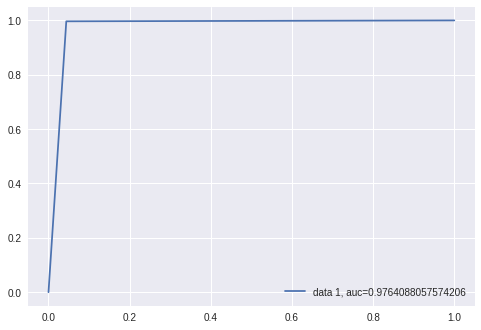

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test_undersample,y_pred_undersample)
auc = metrics.roc_auc_score(y_test_undersample,y_pred_undersample)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()